### McDonalds-Market-Segmentation

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('/content/mcdonalds_dataset.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [22]:
## checking for missing values
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [24]:
df.describe(include=['O']).T

,count,unique,top,freq
yummy,1453,2,Yes,803
convenient,1453,2,Yes,1319
spicy,1453,2,No,1317
fattening,1453,2,Yes,1260
greasy,1453,2,Yes,765
fast,1453,2,Yes,1308
cheap,1453,2,Yes,870
tasty,1453,2,Yes,936
expensive,1453,2,No,933
healthy,1453,2,No,1164


DATA PREPROCESSING


In [25]:
category = []
for i in df.columns:
  if df[i].dtype=='O':
    category.append(i)


for i in category:
  print('Distribution of',i)
  print(df[i].value_counts())
  print('-'*60)


Distribution of yummy
Yes    803
No     650
Name: yummy, dtype: int64
------------------------------------------------------------
Distribution of convenient
Yes    1319
No      134
Name: convenient, dtype: int64
------------------------------------------------------------
Distribution of spicy
No     1317
Yes     136
Name: spicy, dtype: int64
------------------------------------------------------------
Distribution of fattening
Yes    1260
No      193
Name: fattening, dtype: int64
------------------------------------------------------------
Distribution of greasy
Yes    765
No     688
Name: greasy, dtype: int64
------------------------------------------------------------
Distribution of fast
Yes    1308
No      145
Name: fast, dtype: int64
------------------------------------------------------------
Distribution of cheap
Yes    870
No     583
Name: cheap, dtype: int64
------------------------------------------------------------
Distribution of tasty
Yes    936
No     517
Name: tasty, 

In [26]:
df['Age'].value_counts().sort_values()

71     1
19    10
68    13
69    14
70    15
18    16
21    16
66    17
28    18
46    19
20    21
45    22
41    23
65    23
22    23
54    24
63    25
27    25
43    25
48    26
67    26
61    26
33    26
25    26
38    27
31    27
40    27
30    28
29    28
34    28
39    29
23    30
42    30
47    30
51    30
35    30
24    30
26    31
53    31
44    32
64    32
56    32
32    33
50    34
62    34
49    34
36    35
58    35
52    36
57    36
59    36
37    37
60    38
55    53
Name: Age, dtype: int64

In [27]:
## creating bins for the age

df['Agebin'] = pd.cut(df['Age'], bins = [17,25, 35, 49, 60, 75], labels = ['17-25','26-35', '36-49', '50-60', '61-75'])

In [28]:
df['Agebin'].value_counts()/len(df)*100

36-49    27.253957
50-60    26.496903
26-35    18.857536
61-75    15.554026
17-25    11.837577
Name: Agebin, dtype: float64

### Data Visualization

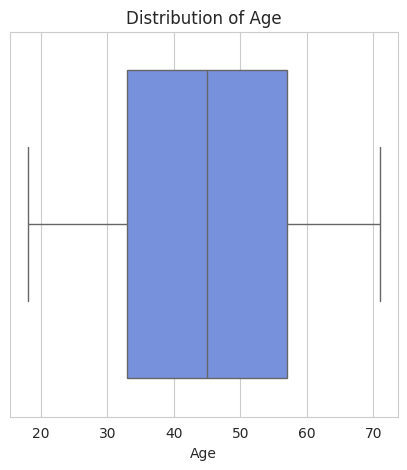

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.set_palette('coolwarm')
sns.boxplot(x=df['Age'])
plt.title('Distribution of Age')
plt.show()

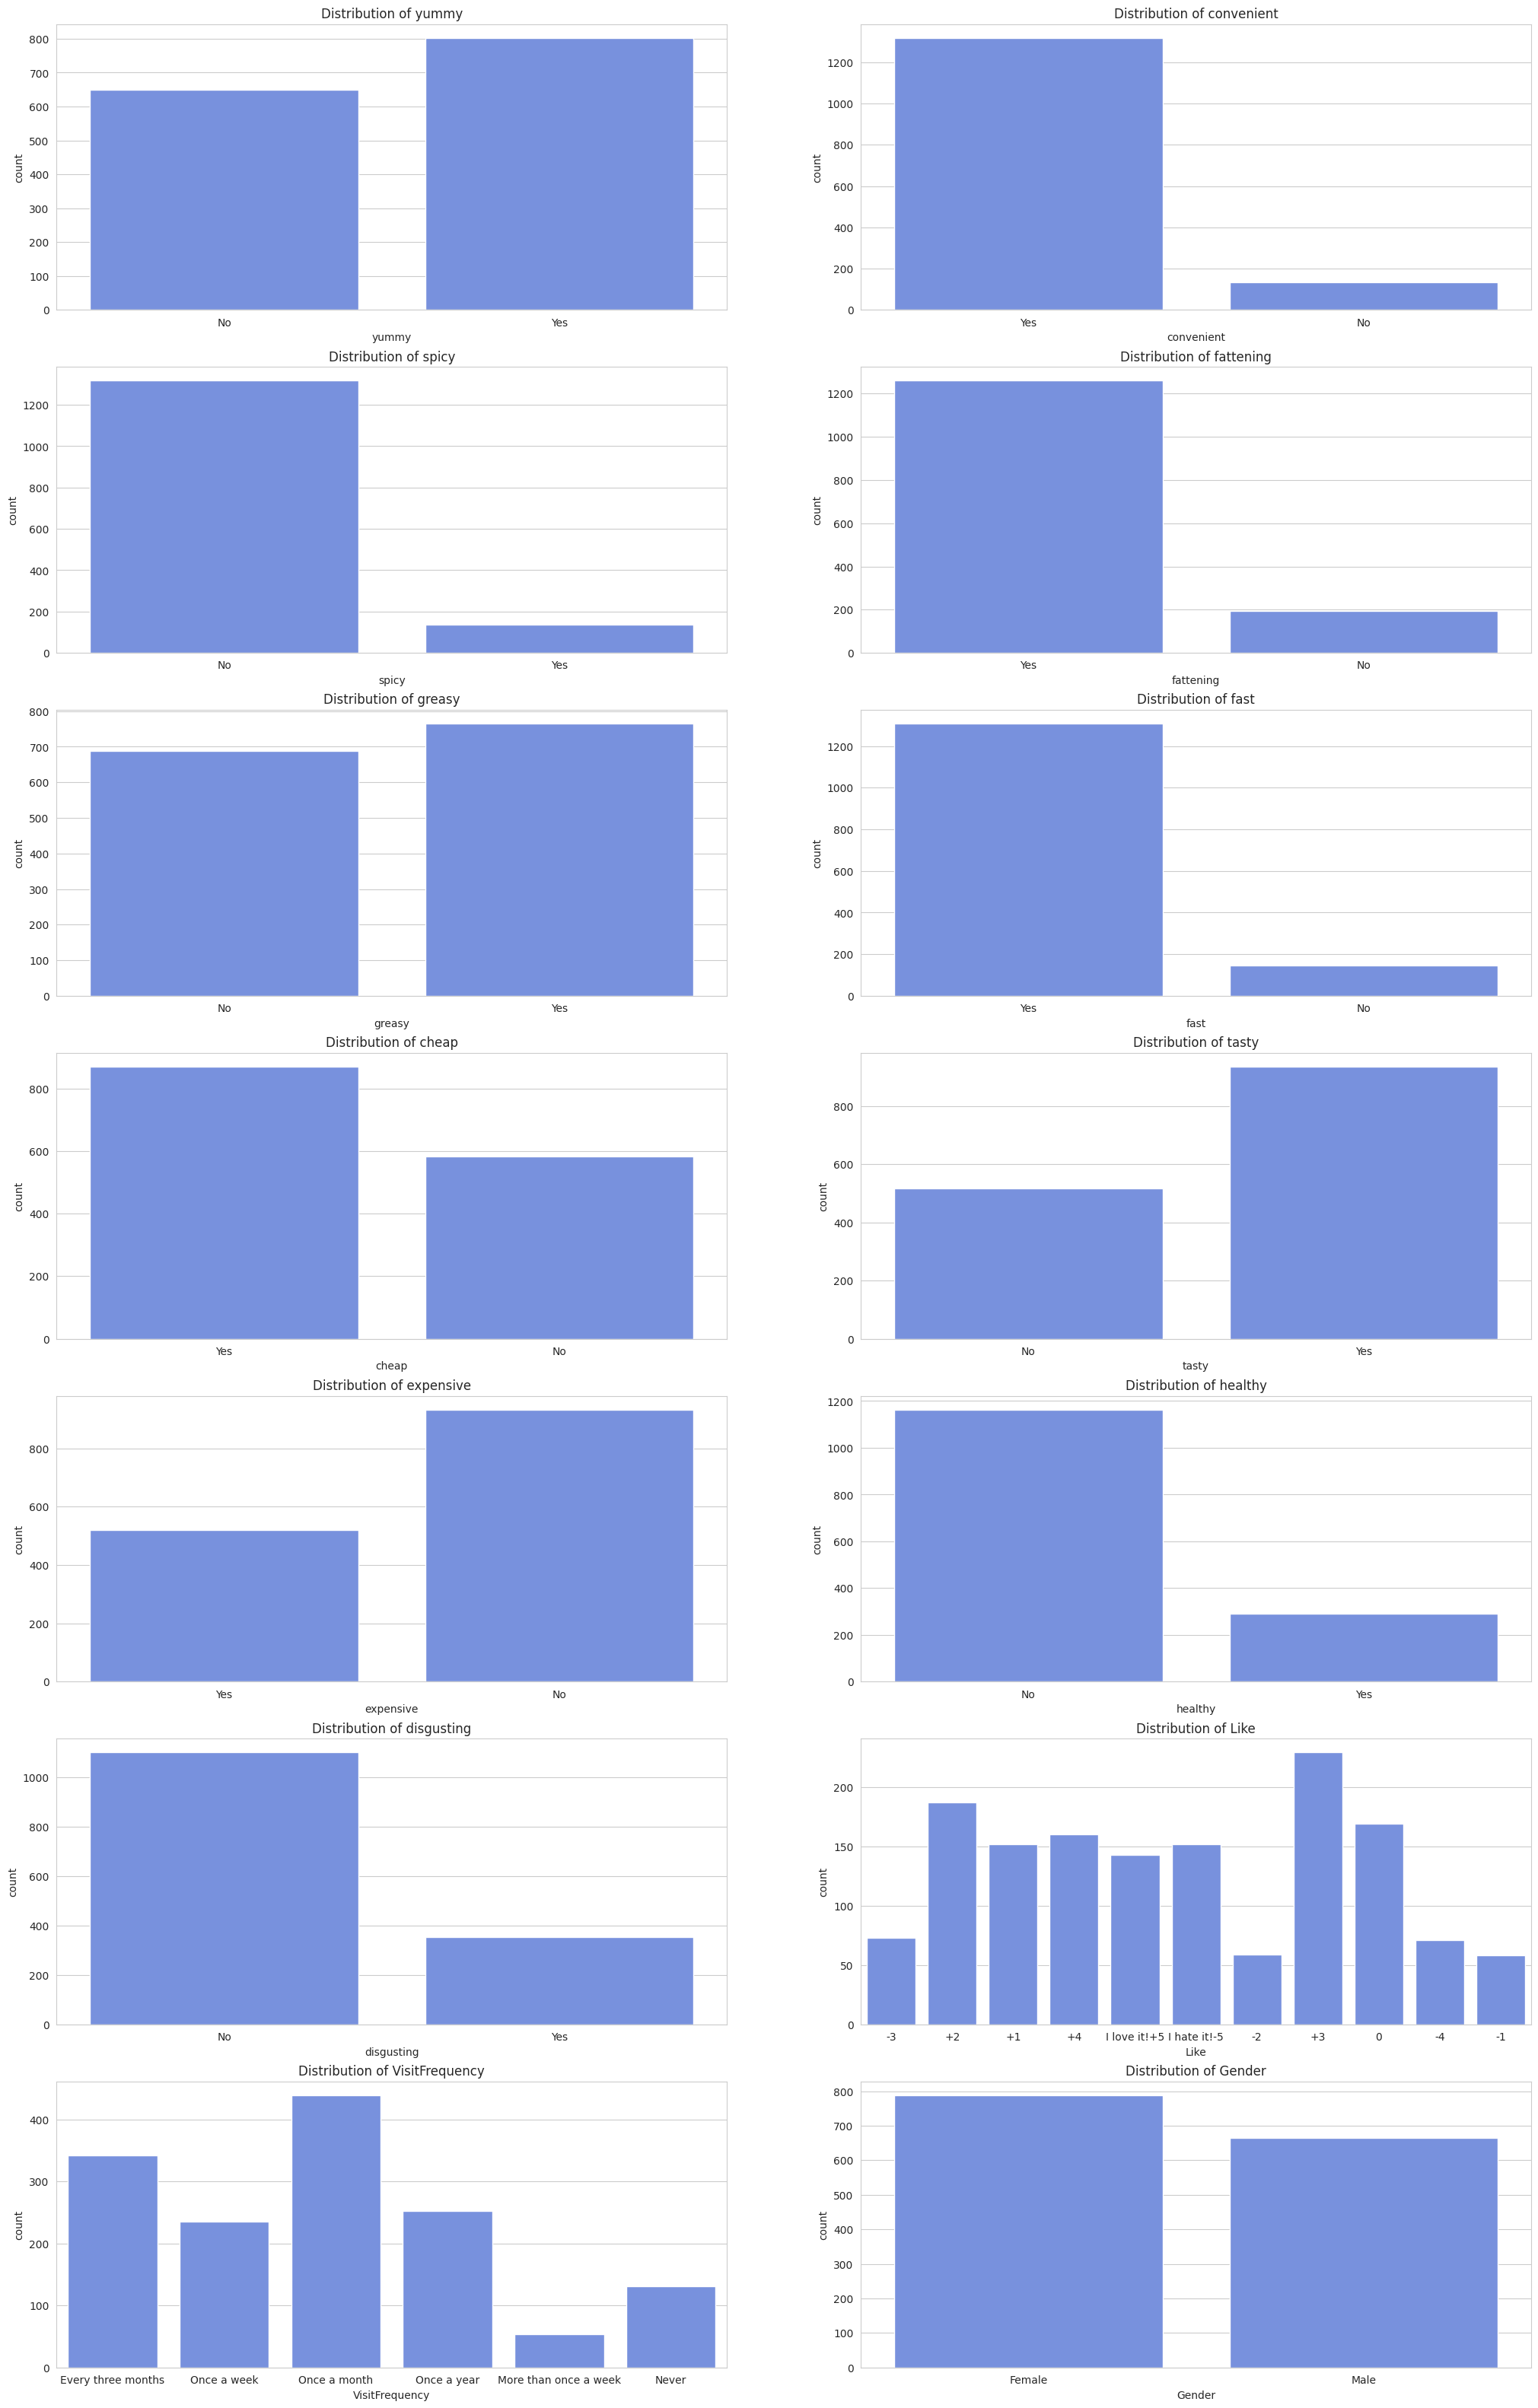

In [30]:
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9],[ax10,ax11],[ax12,ax13]) = plt.subplots(ncols=2,nrows=7,figsize=(25,40))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]
for i in range(0,14):
  sns.countplot(data=df,x=category[i],ax=ax[i])
  ax[i].set_title('Distribution of '+category[i])

plt.savefig('count.png')

Observations

There are many customers who have never visited once
Majority of the customers visits once a month
+3 and +2 is given by approx 30 percent the customers
60% customers Found the food yummy
Approx 90 percent doesn't found convinent and spicy
Most of the customers found the service fast and cheap

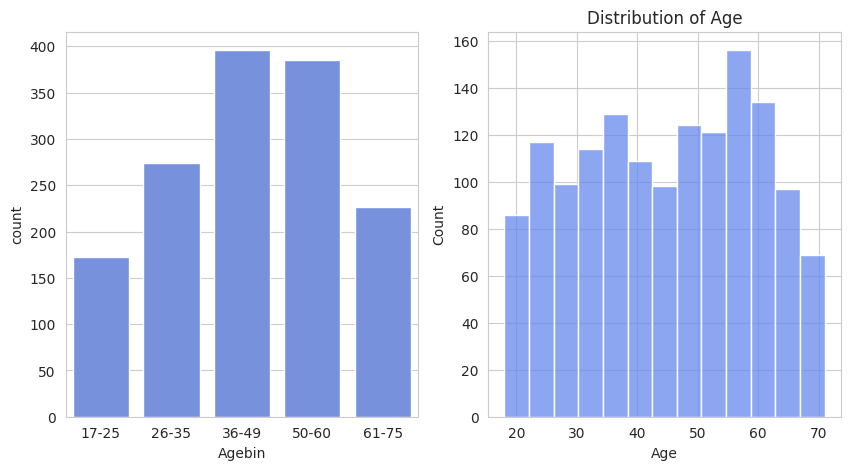

In [31]:
fig,[ax0,ax1] = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x=df['Agebin'],ax=ax0)
sns.histplot(x=df['Age'],ax=ax1)
plt.title('Distribution of Age')
plt.savefig('count1.png')
plt.show()

Observations

Majority of the customers aged between 36-49
Distribution of age is quite a normal
Atleast 10 percent of the customers belongs to each of the age group

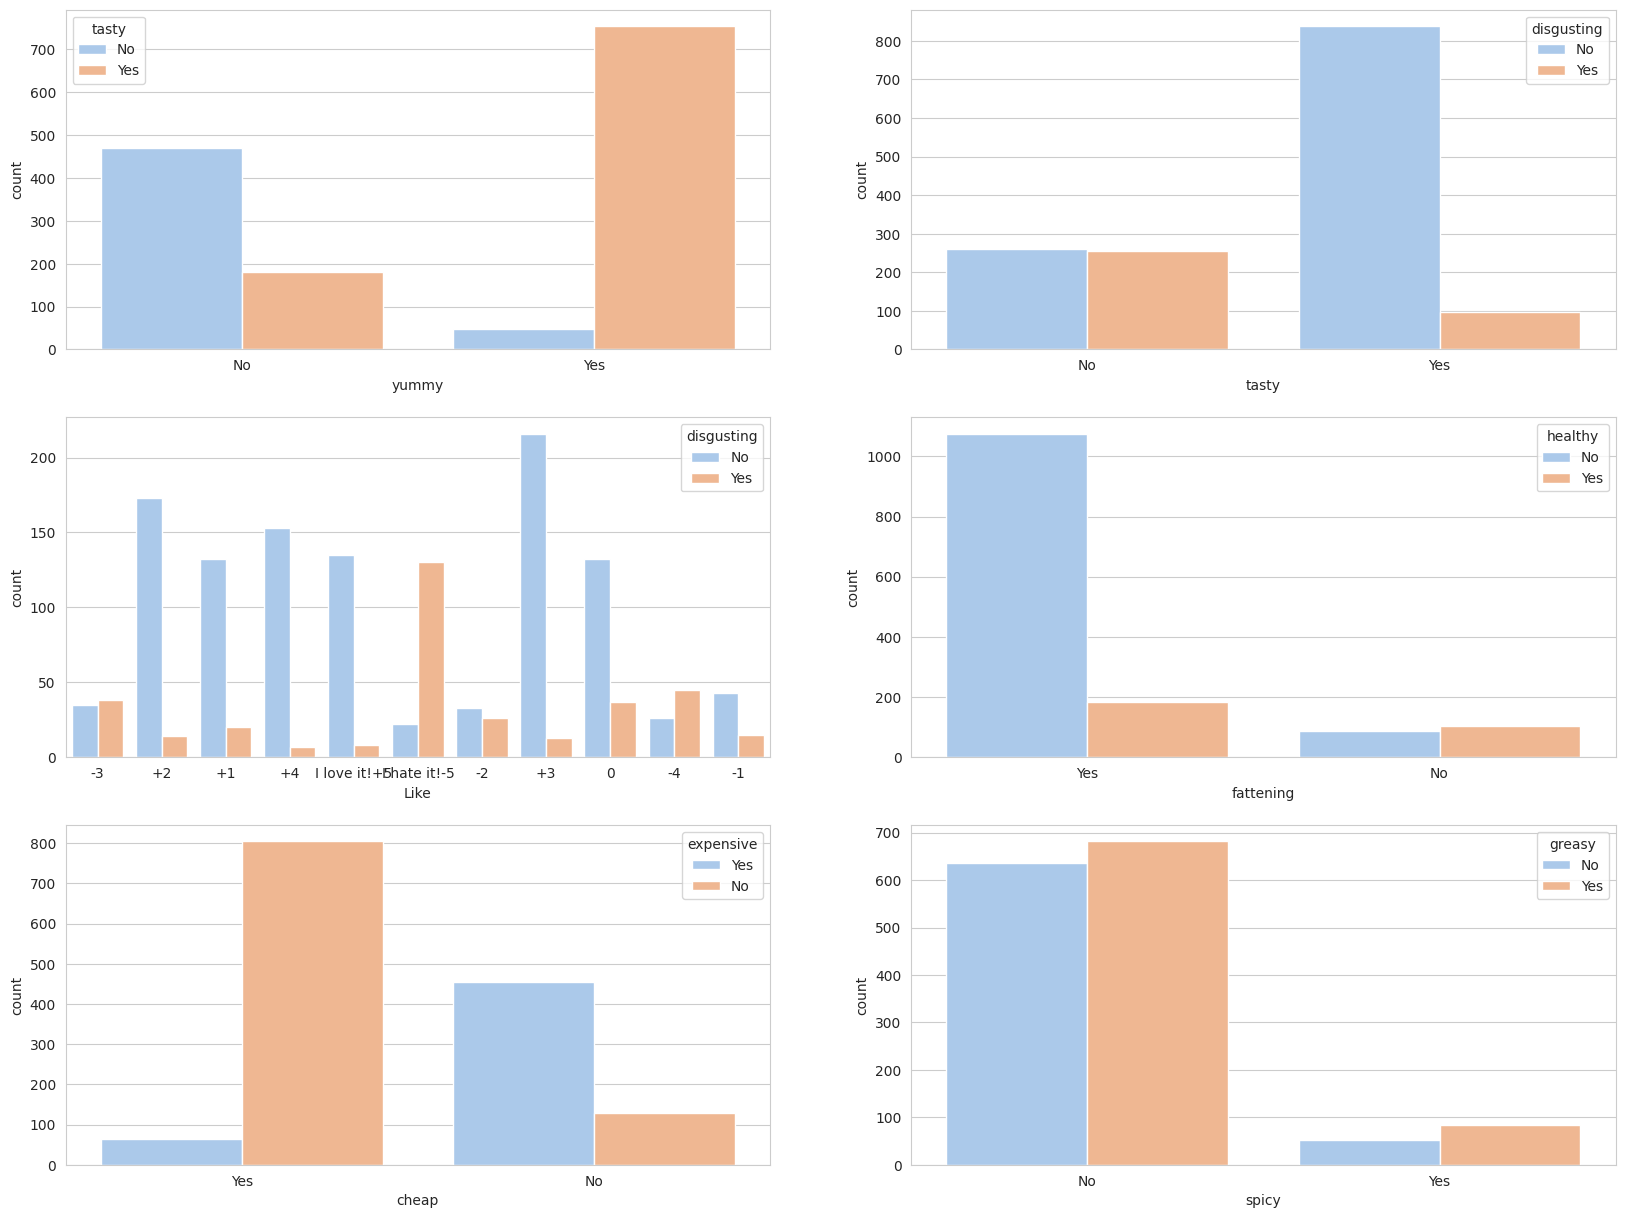

In [32]:
sns.set_palette('pastel')
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5]) = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sns.countplot(x=df['yummy'],hue=df['tasty'],ax=ax0)
sns.countplot(x=df['tasty'],hue=df['disgusting'],ax=ax1)
sns.countplot(hue=df['disgusting'],x=df['Like'],ax=ax2)
sns.countplot(x=df['fattening'],hue=df['healthy'],ax=ax3)
sns.countplot(x=df['cheap'],hue=df['expensive'],ax=ax4)
sns.countplot(x=df['spicy'],hue=df['greasy'],ax=ax5)
plt.savefig('count2.png')
plt.show()

Observations

From the plot it can be seen data have alot of discrepencies
yummy and tasty are a kind of same can remove either of one
Some of the customers rate the food tasty as well as disgusting and vice-versa, needs to check the data
same error can be seen in cheap,expensive,disgusting,Likes,fattening,healthy


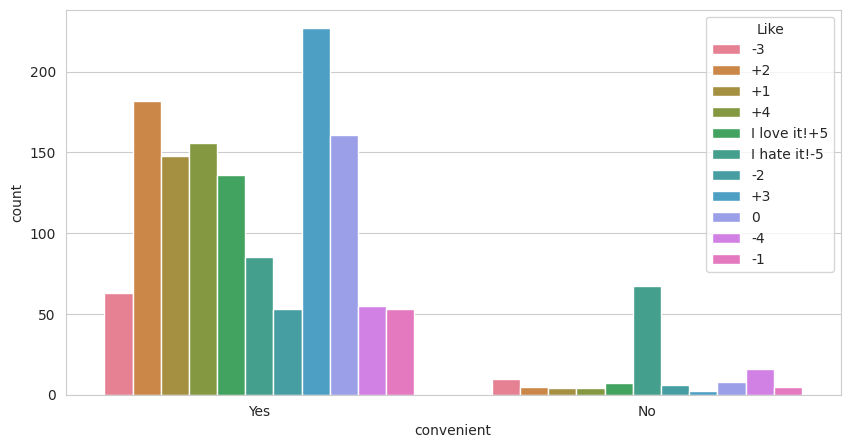

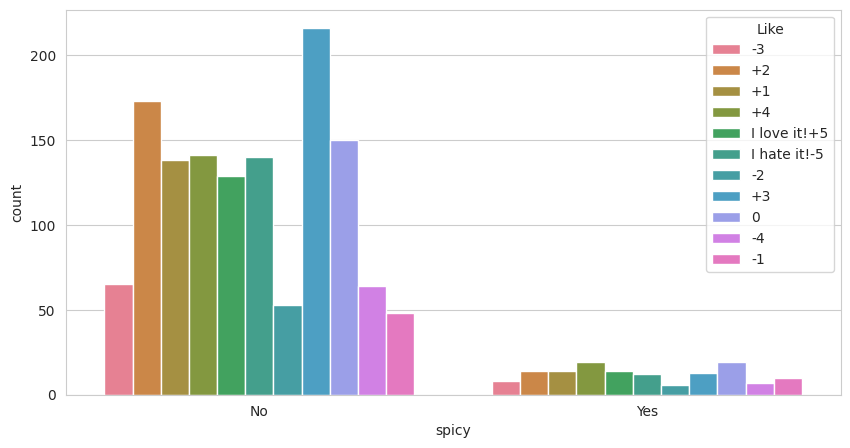

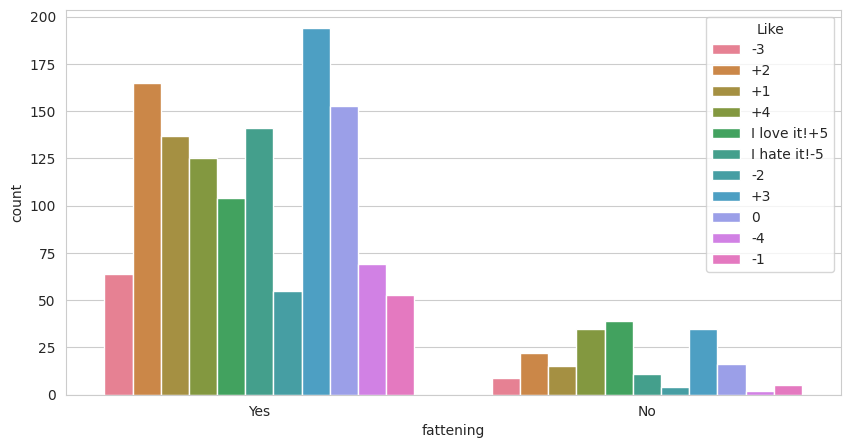

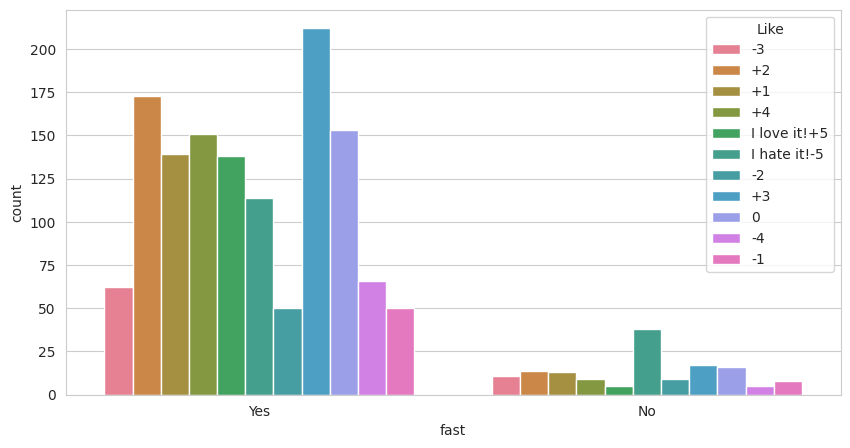

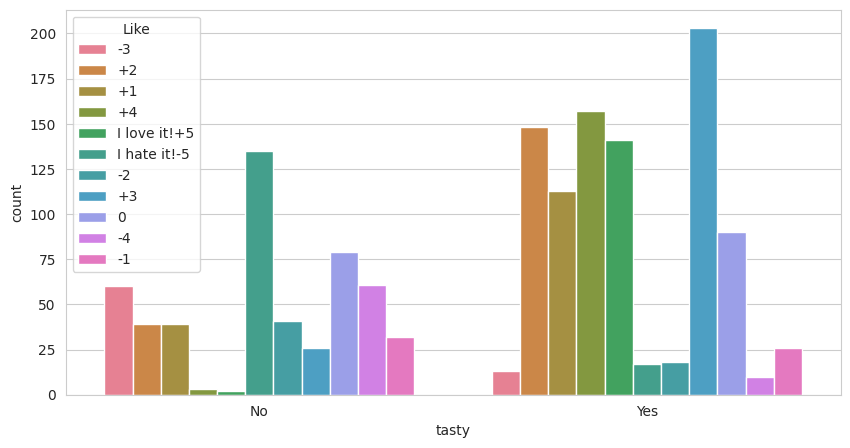

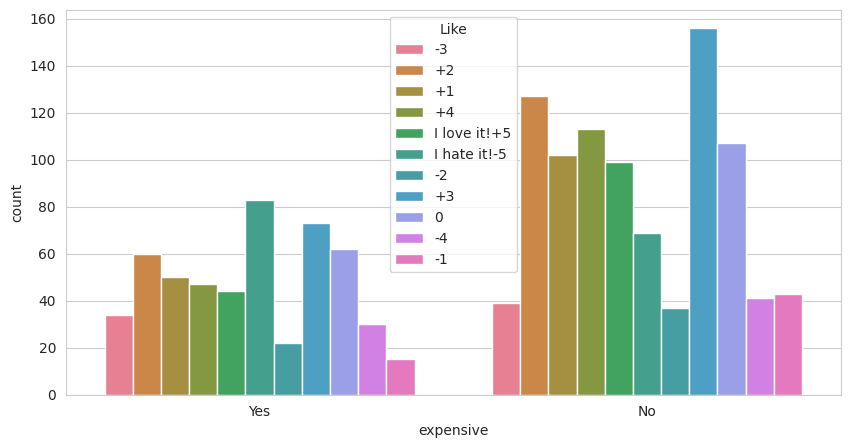

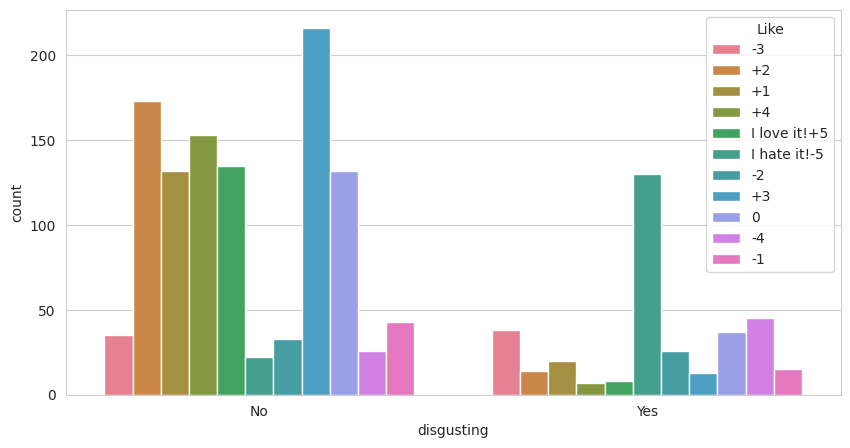

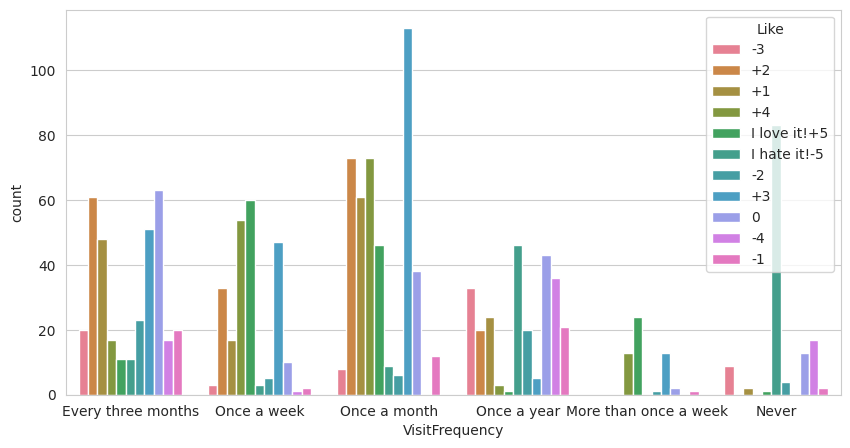

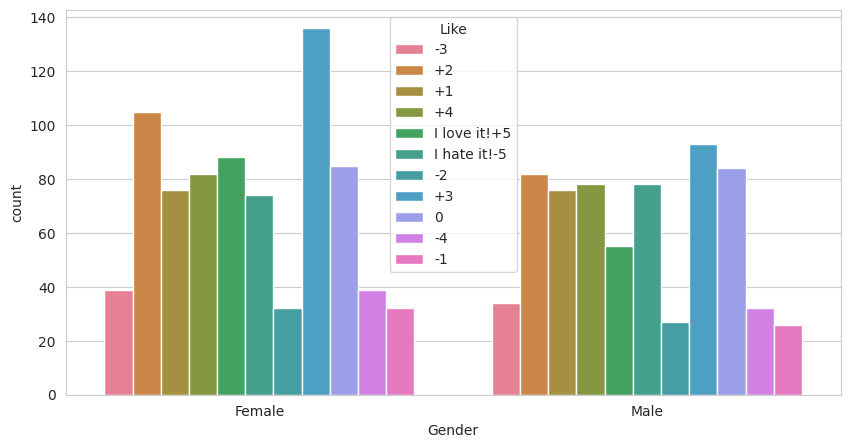

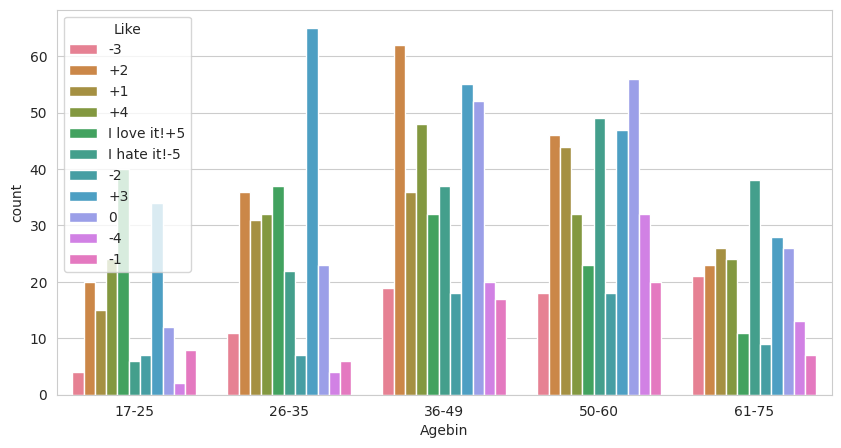

<Figure size 640x480 with 0 Axes>

In [33]:
sns.set_style('whitegrid')
for i in df.drop(['Like','yummy','cheap','healthy','greasy','Age'],axis=1).columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[i],hue=df['Like'])
  plt.show()

plt.savefig('count3.png')

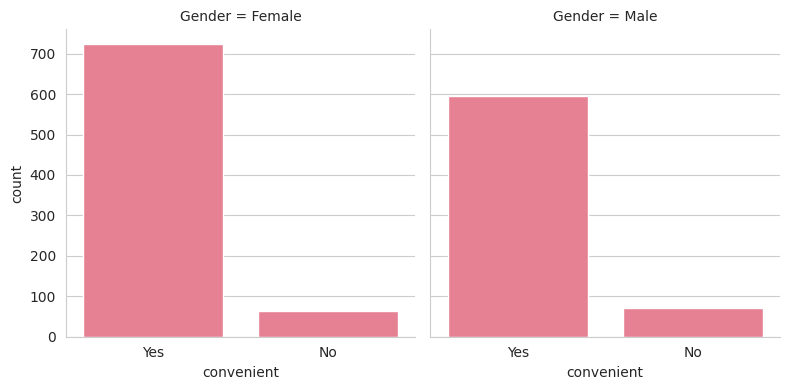

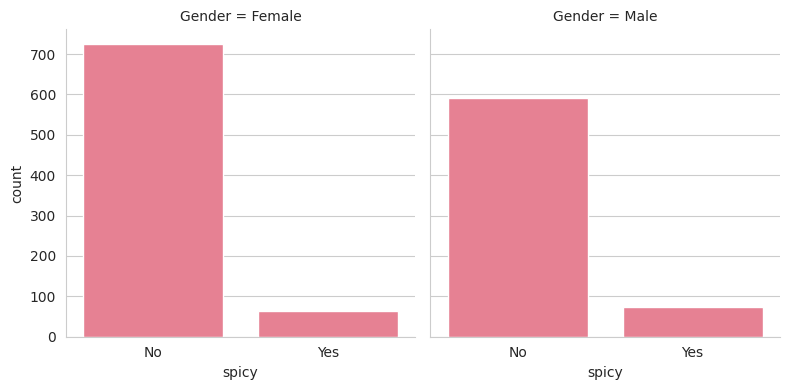

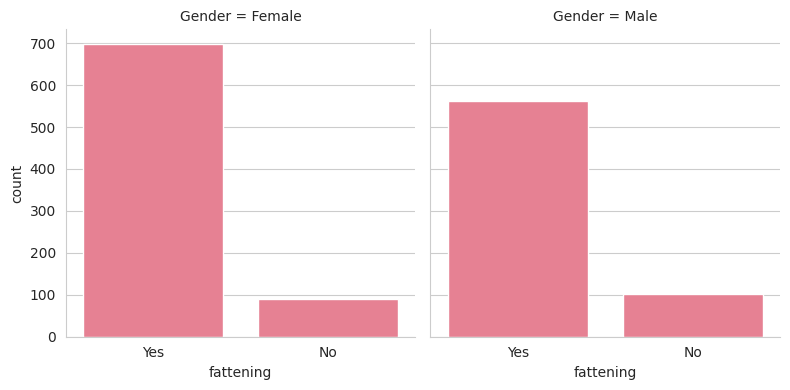

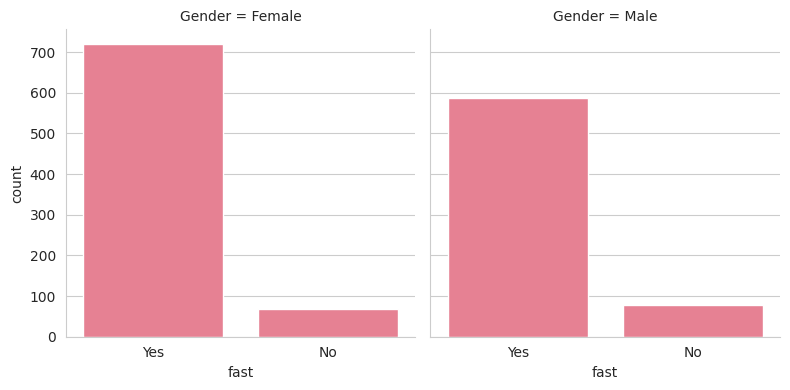

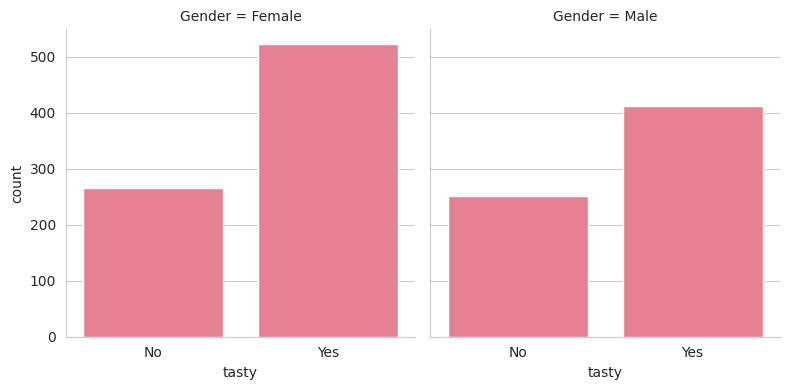

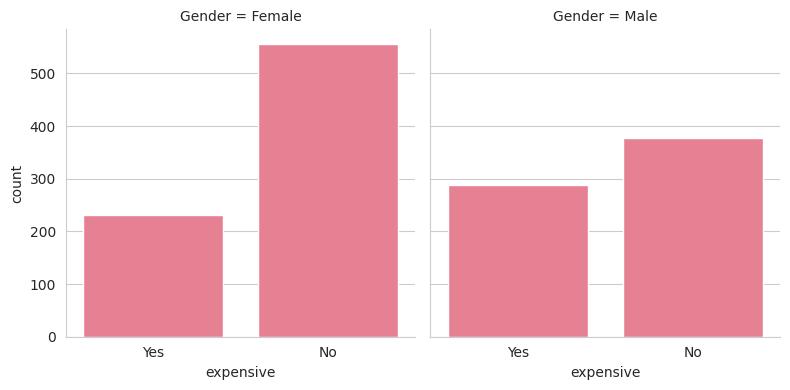

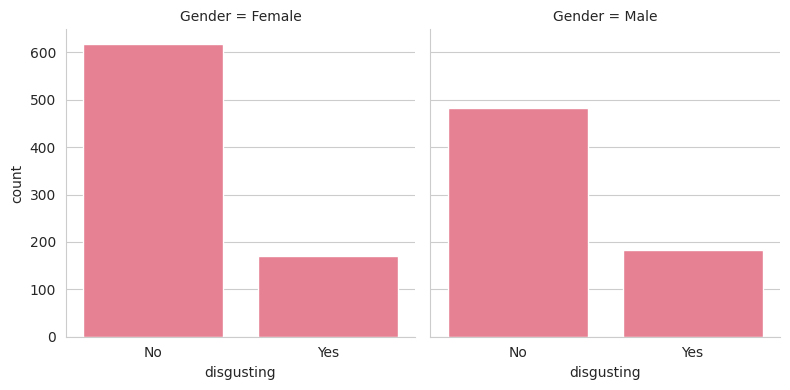

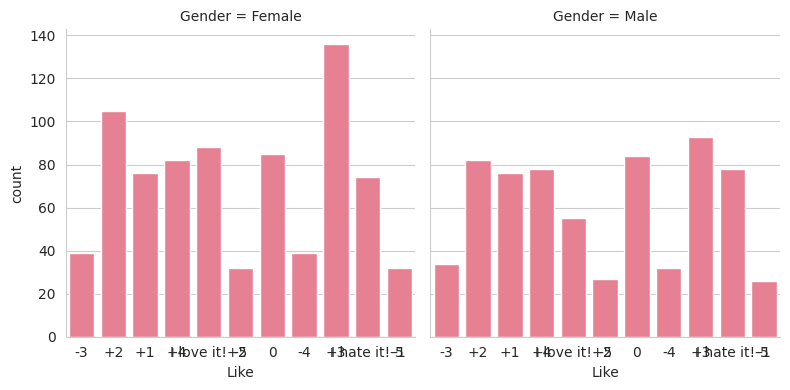

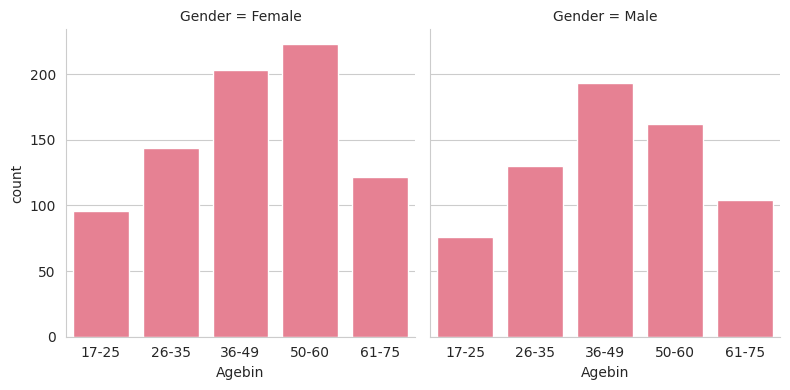

In [34]:
sns.set_palette('husl')
for i in df.drop(['Gender','yummy','cheap','healthy','greasy','Age','VisitFrequency'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='Gender')
  grid = grid.map(sns.countplot,i)
plt.savefig('count4.png')
plt.show()

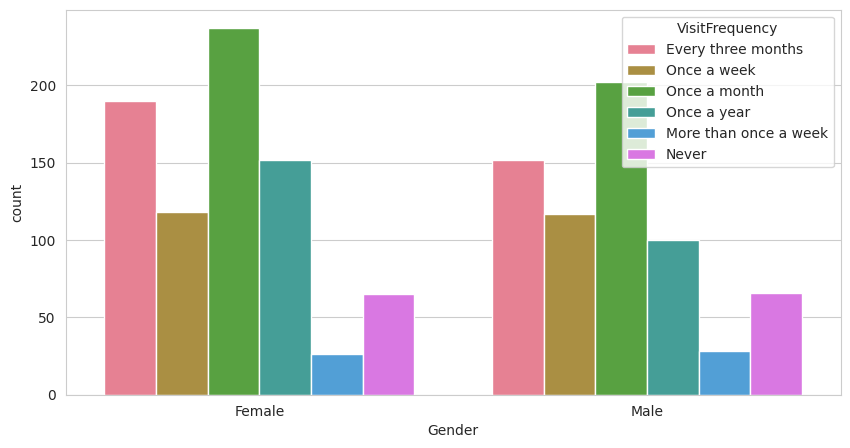

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(hue=df['VisitFrequency'],x=df['Gender'])
plt.savefig('count5.png')

Observations

Female customers found it less convenient than male customers
Majority of the female customers found the food expensive where as males doesn't
Both the male and the female customers are almost alikly distributed

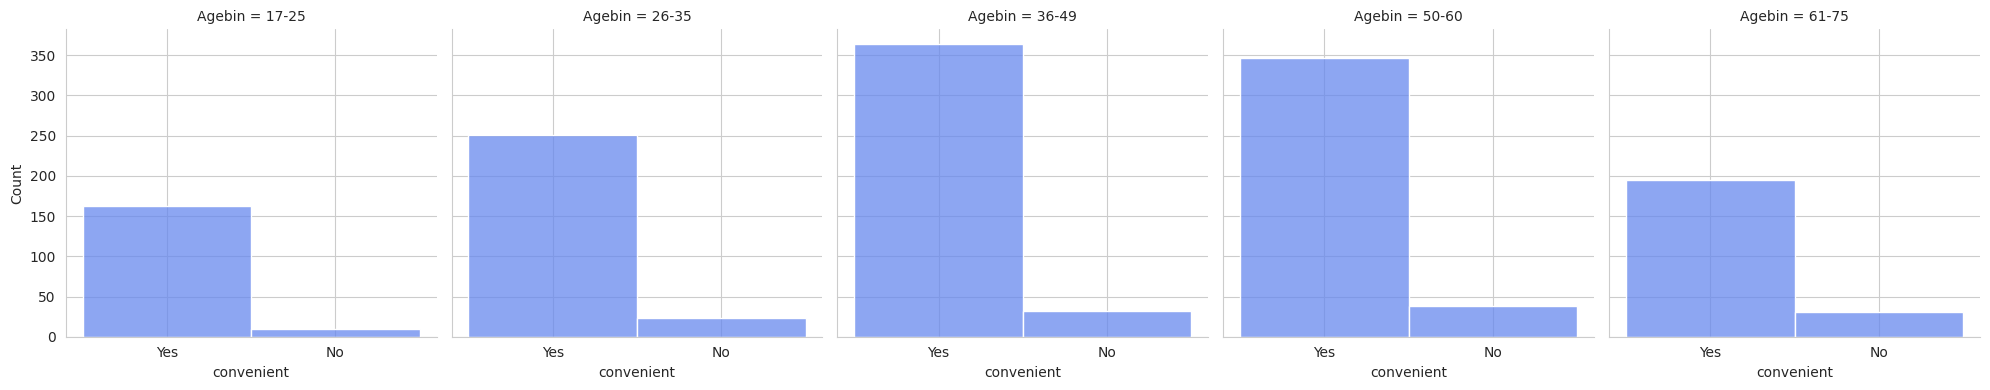

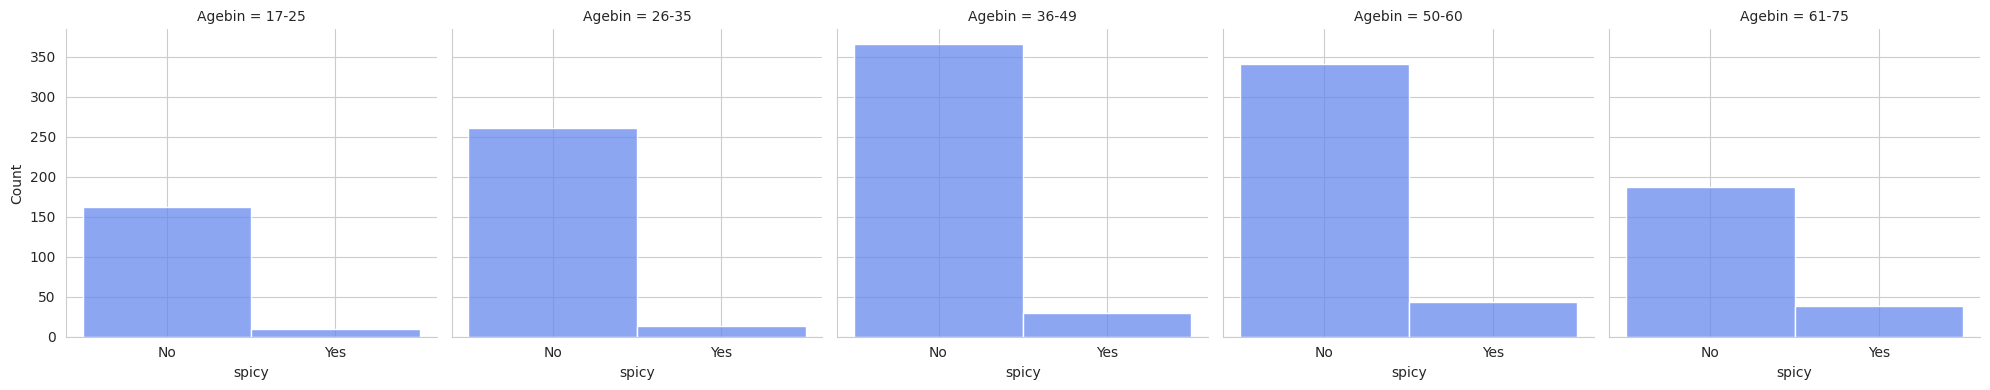

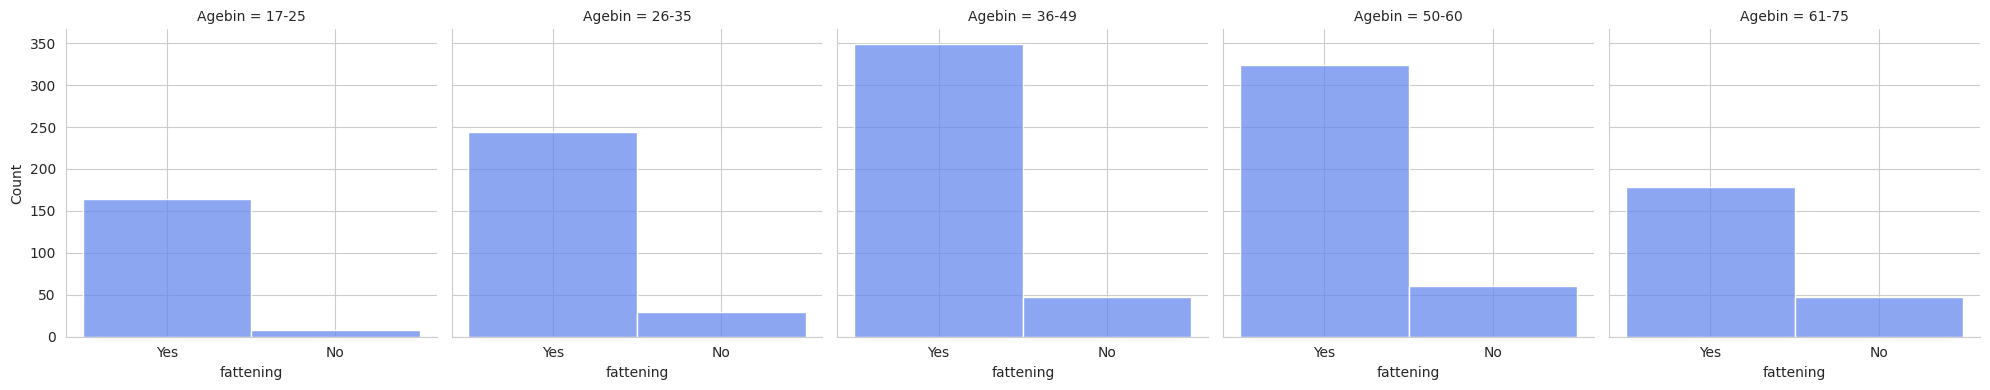

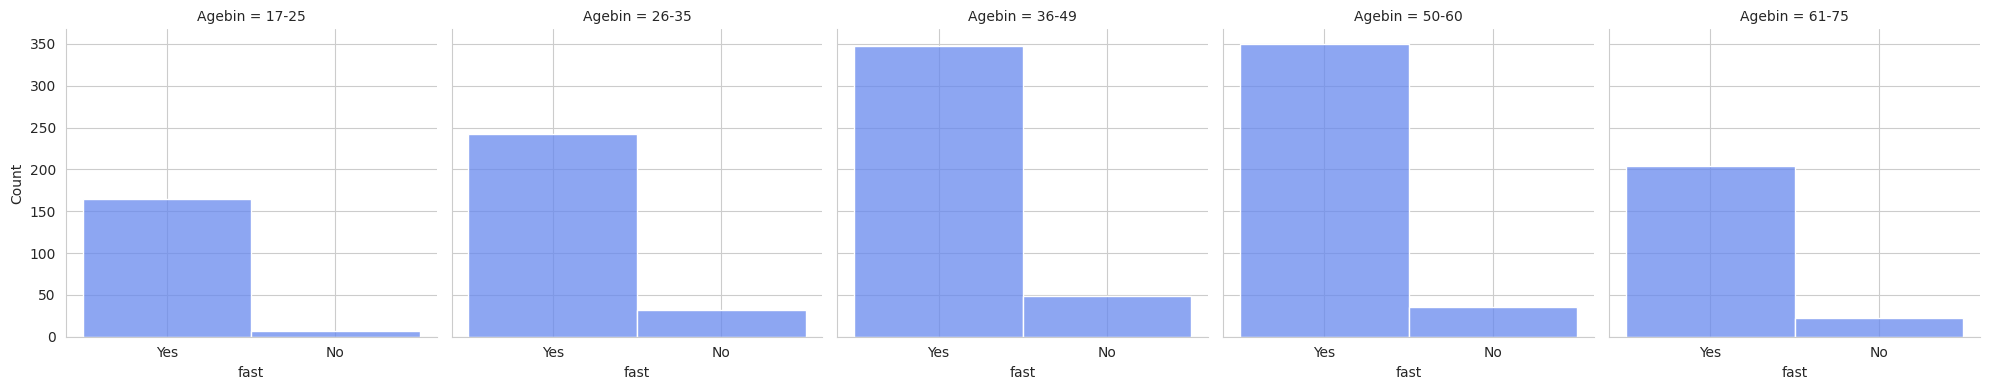

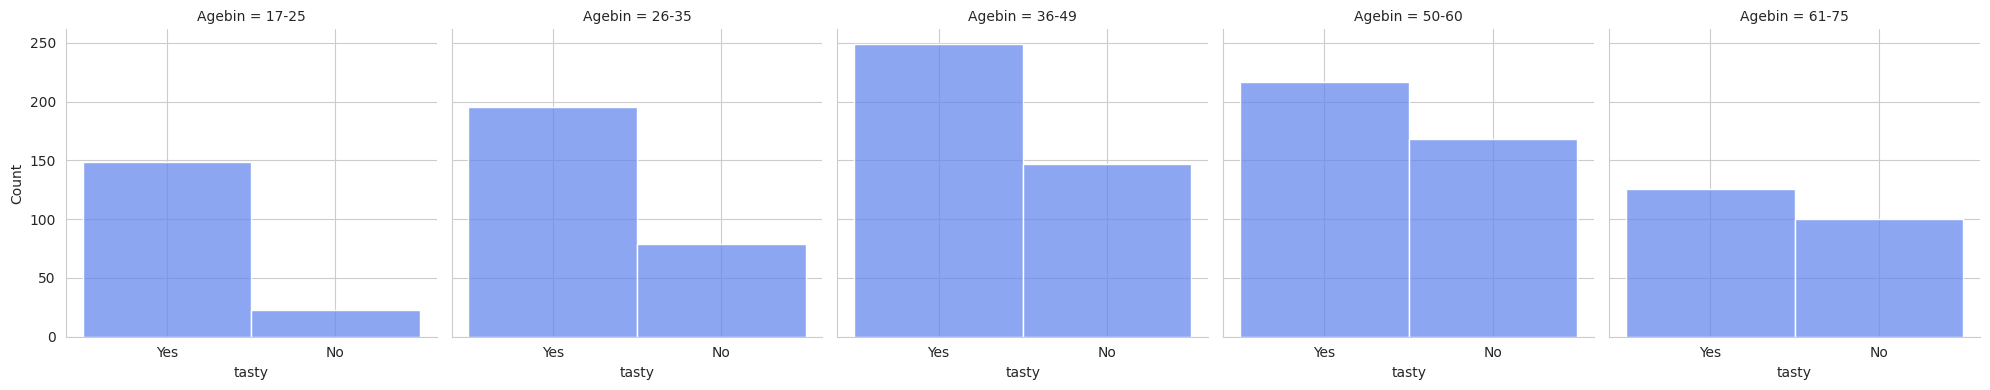

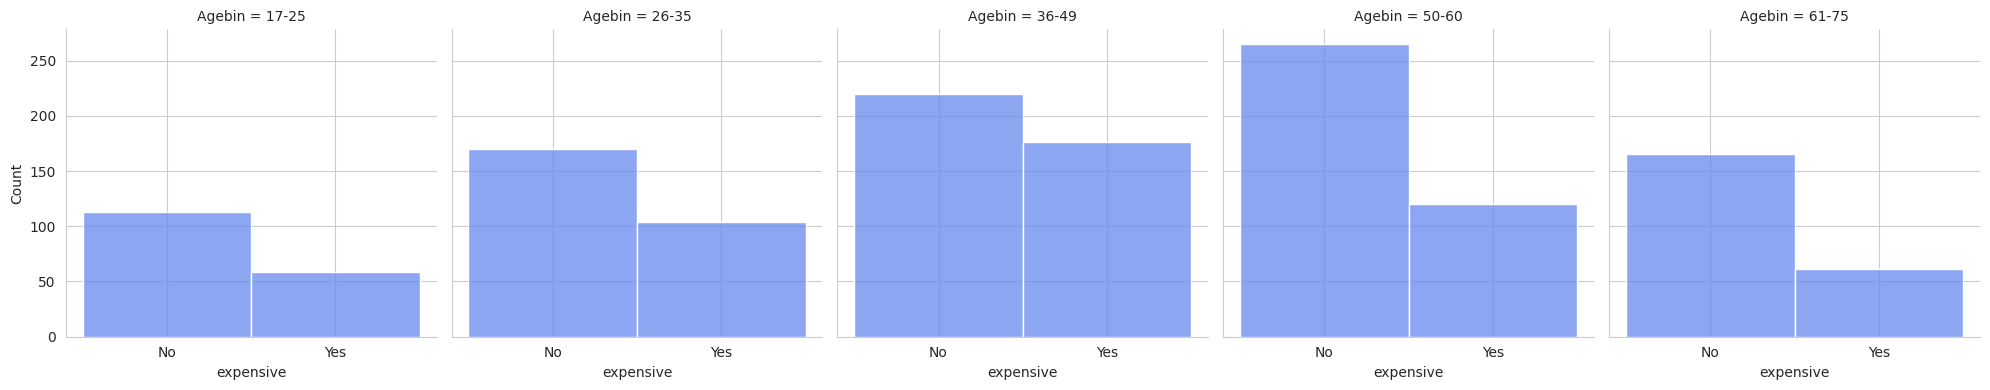

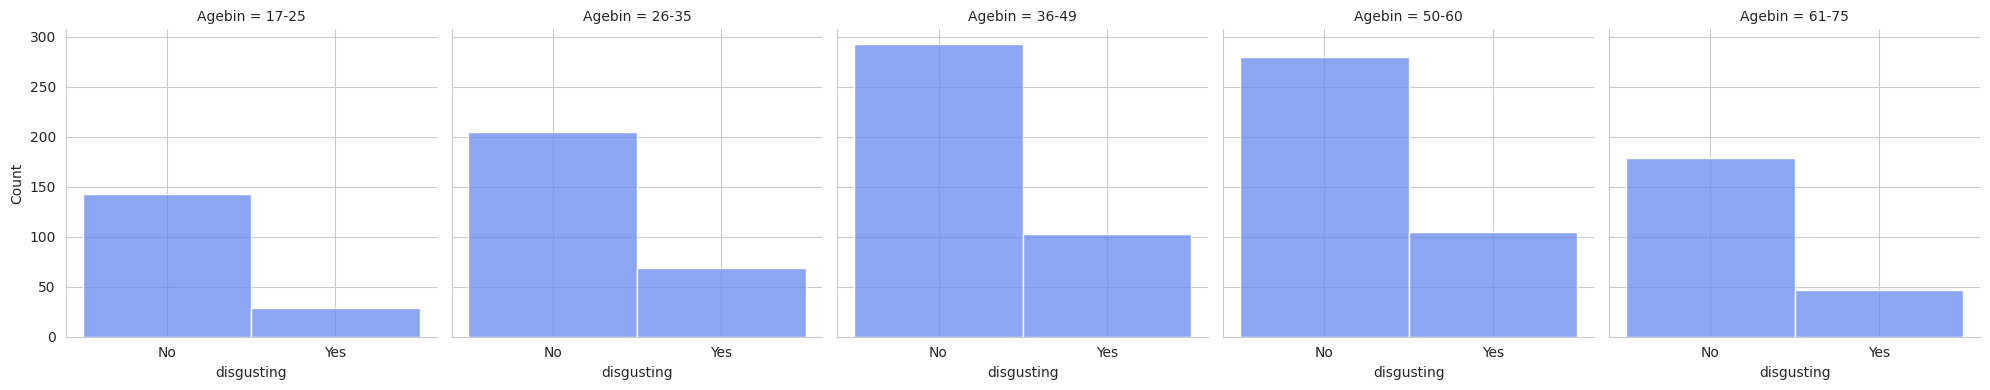

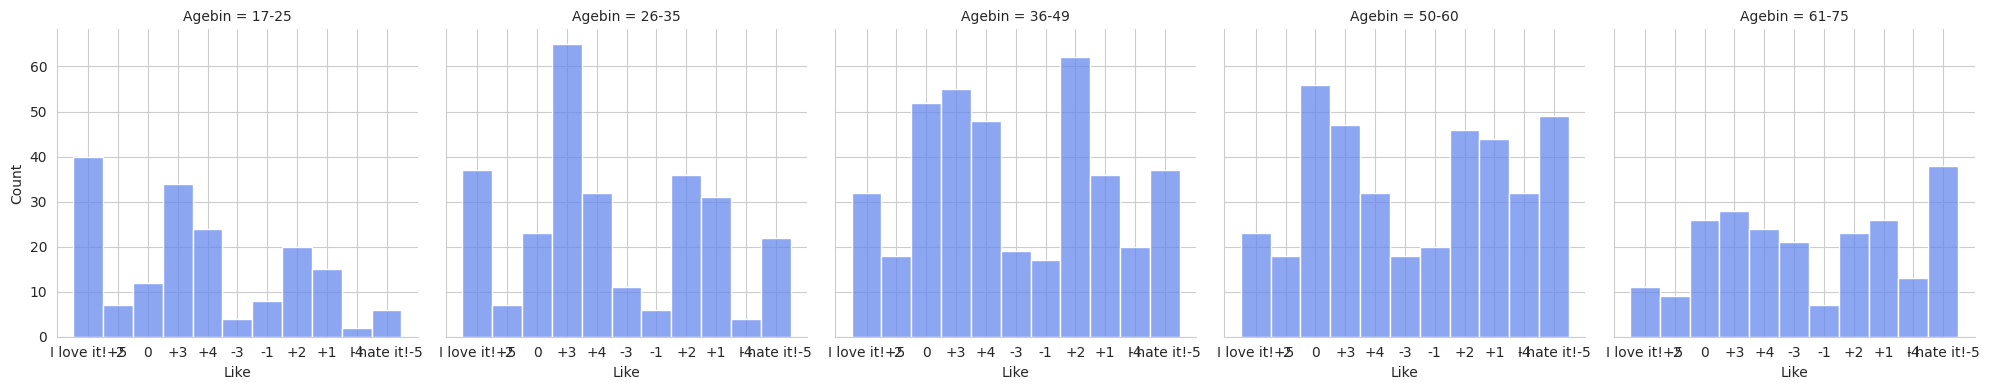

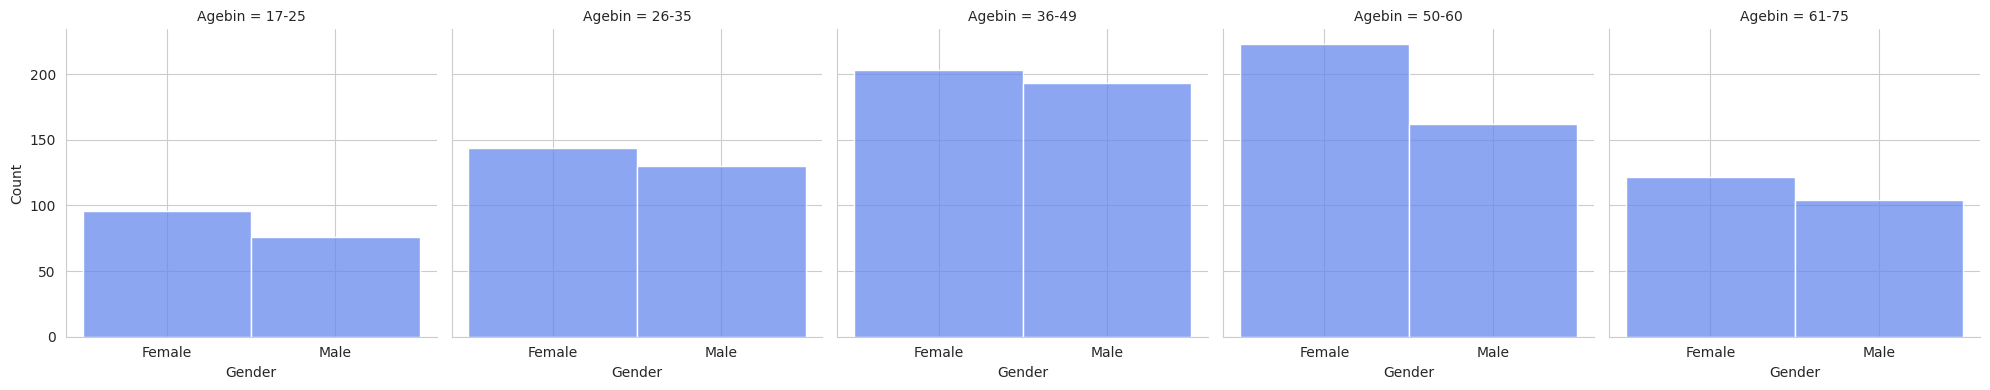

In [36]:
sns.set_palette('coolwarm')
for i in df.drop(['Agebin','yummy','cheap','healthy','greasy','Age','VisitFrequency'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='Agebin')
  grid = grid.map(sns.histplot,i,bins=30)
plt.savefig('count6.png')
plt.show()

### Data Preprocessing



In [37]:
# converting into numericals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   yummy           1453 non-null   object  
 1   convenient      1453 non-null   object  
 2   spicy           1453 non-null   object  
 3   fattening       1453 non-null   object  
 4   greasy          1453 non-null   object  
 5   fast            1453 non-null   object  
 6   cheap           1453 non-null   object  
 7   tasty           1453 non-null   object  
 8   expensive       1453 non-null   object  
 9   healthy         1453 non-null   object  
 10  disgusting      1453 non-null   object  
 11  Like            1453 non-null   object  
 12  Age             1453 non-null   int64   
 13  VisitFrequency  1453 non-null   object  
 14  Gender          1453 non-null   object  
 15  Agebin          1453 non-null   category
dtypes: category(1), int64(1), object(14)
memory usage: 172.0+ KB

In [38]:
df['yummy'] = df['yummy'].replace(['Yes','No'],[1,0])
df['convenient'] = df['convenient'].replace(['Yes','No'],[1,0])
df['spicy'] = df['spicy'].replace(['Yes','No'],[1,0])
df['fattening'] = df['fattening'].replace(['Yes','No'],[1,0])
df['greasy'] = df['greasy'].replace(['Yes','No'],[1,0])
df['fast'] = df['fast'].replace(['Yes','No'],[1,0])
df['cheap'] = df['cheap'].replace(['Yes','No'],[1,0])
df['tasty'] = df['tasty'].replace(['Yes','No'],[1,0])
df['expensive'] = df['expensive'].replace(['Yes','No'],[1,0])
df['healthy'] = df['healthy'].replace(['Yes','No'],[1,0])
df['disgusting'] = df['disgusting'].replace(['Yes','No'],[1,0])
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])
df['VisitFrequency'] = df['VisitFrequency'].replace(['Never','Once a year','Every three months','Once a month','Once a week','More than once a week'],[0,1,2,3,4,5])
df['Like'] = df['Like'].replace(['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5'],[-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [39]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Agebin
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0,61-75
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0,50-60
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0,61-75
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,61-75
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,36-49


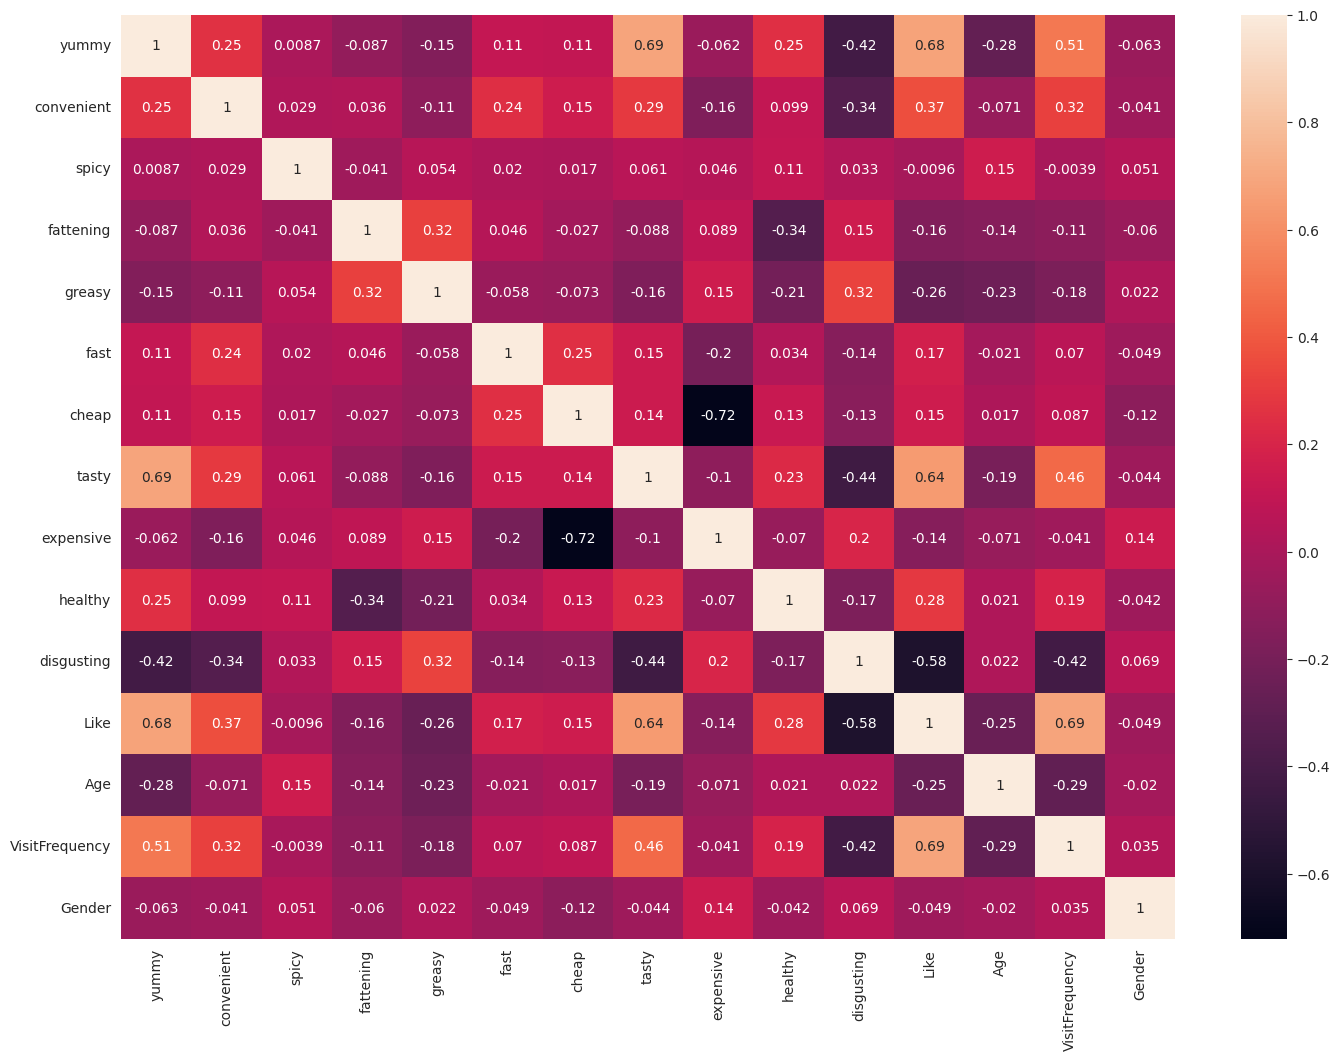

In [40]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True)
plt.savefig('count8.png')

Observations

yummy is correlated with like and tasty
expensive with cheap

### Extract Segments

In [41]:
##Using k-means clustering

from sklearn.decomposition import PCA

pca = PCA(n_components=14)
data = pca.fit_transform(df.drop(['Age','Agebin'],axis=1))
pc = pd.DataFrame(data=data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14'])

In [42]:
pc.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,3.746578,0.711531,-0.340867,0.442599,0.615926,-0.337585,-0.319521,-0.242126,-0.376609,-0.188142,0.138768,0.184291,0.539076,-0.553440
1,-1.112208,-0.719394,0.251637,-0.675627,0.340507,0.356094,-0.151875,-0.086281,-0.079150,-0.089554,-0.036662,0.126941,0.507671,-0.531743
2,-0.078865,-0.393926,0.747944,-0.168268,0.539078,0.203277,0.720776,-0.885240,-0.623744,0.597505,0.321975,-0.321744,0.068764,0.222372
3,-3.519994,0.537511,-0.321155,-1.034471,0.080770,-0.120180,0.274559,0.801217,-0.103357,0.065294,-0.222402,-0.082562,-0.214825,-0.005298
4,-1.252794,0.234411,-0.340806,-0.131475,-0.792487,-0.645553,0.788675,-0.647022,-0.106097,-0.472202,0.208451,-0.096126,0.023990,0.136414


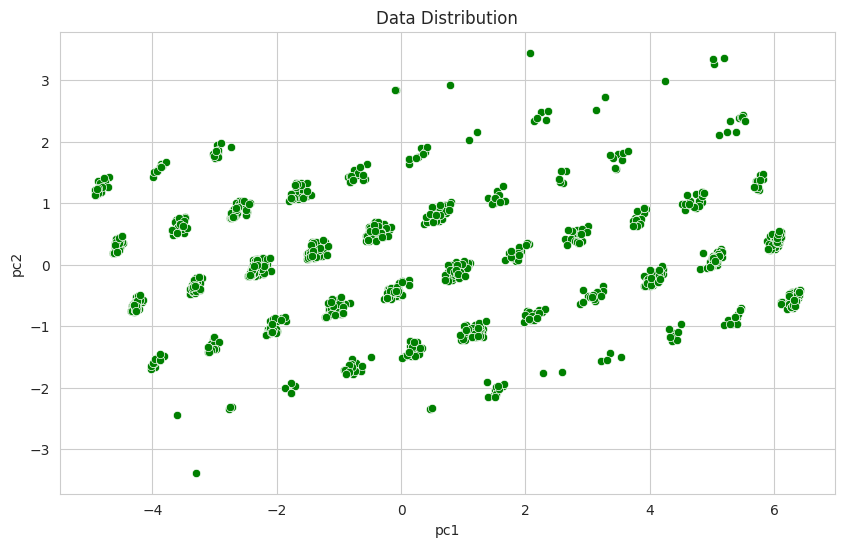

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=pc,x='pc1',y='pc2',color='green')
plt.title('Data Distribution')
plt.savefig('count8.png')

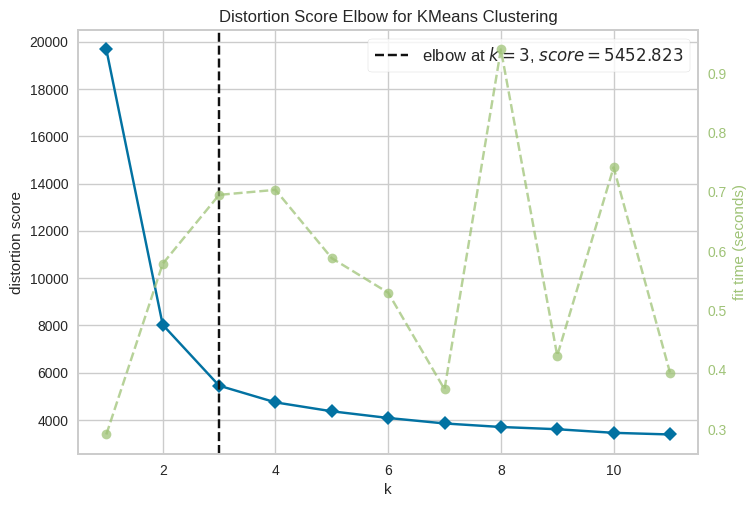

<Figure size 800x550 with 0 Axes>

In [44]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(pc)
visualizer.show()
plt.savefig('count9.png')

In [45]:
# training the model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)

KMeans(n_clusters=3)

In [46]:
# predicting the clusters
np.random.seed(42)
preds = kmeans.predict(pc)

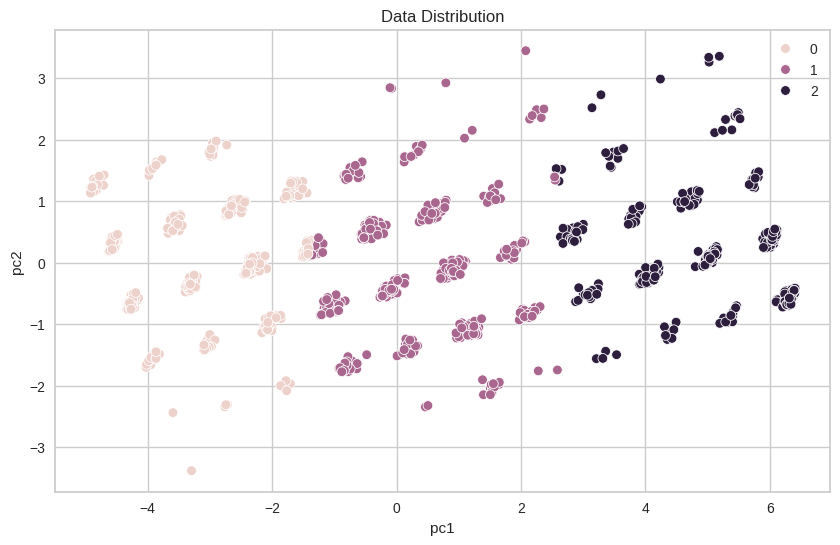

In [47]:
# plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pc['pc1'],y=pc['pc2'],hue=preds)
plt.title('Data Distribution')
plt.savefig('count10.png')
plt.show()

In [48]:
df['cluster'] = preds

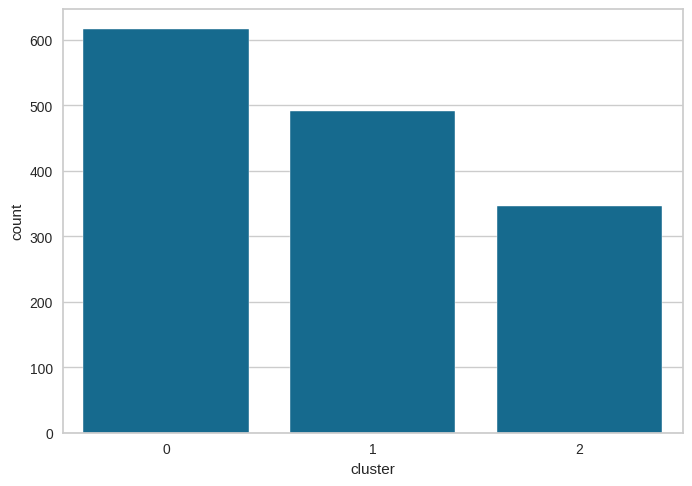

In [49]:
sns.countplot(x = df['cluster'])
plt.savefig('count11.png')

In [50]:
df['cluster'].value_counts()/len(df)*100

0    42.395045
1    33.792154
2    23.812801
Name: cluster, dtype: float64

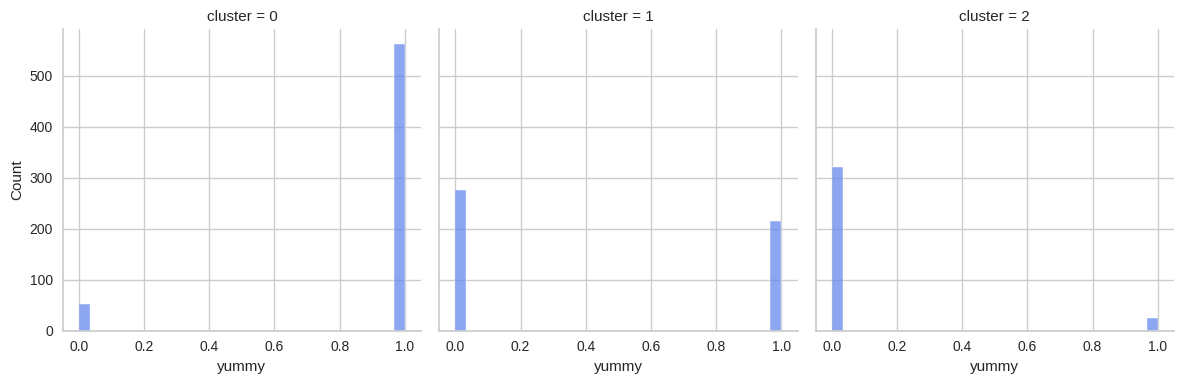

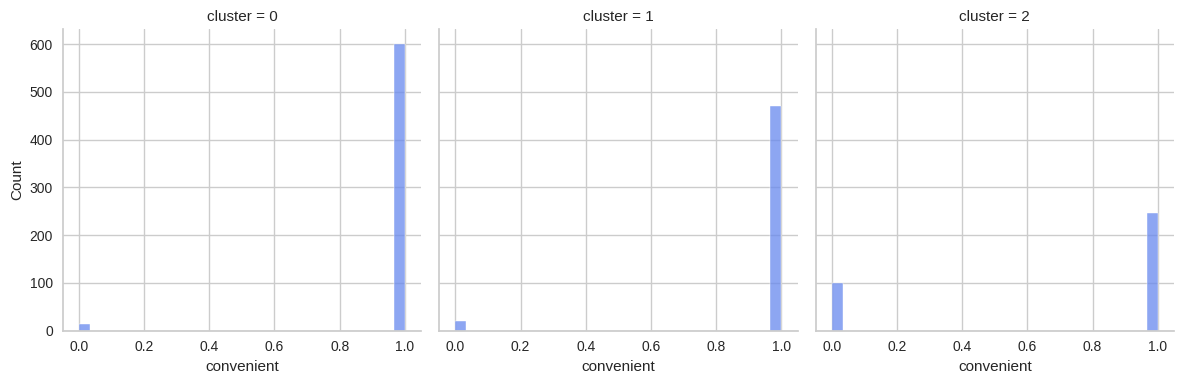

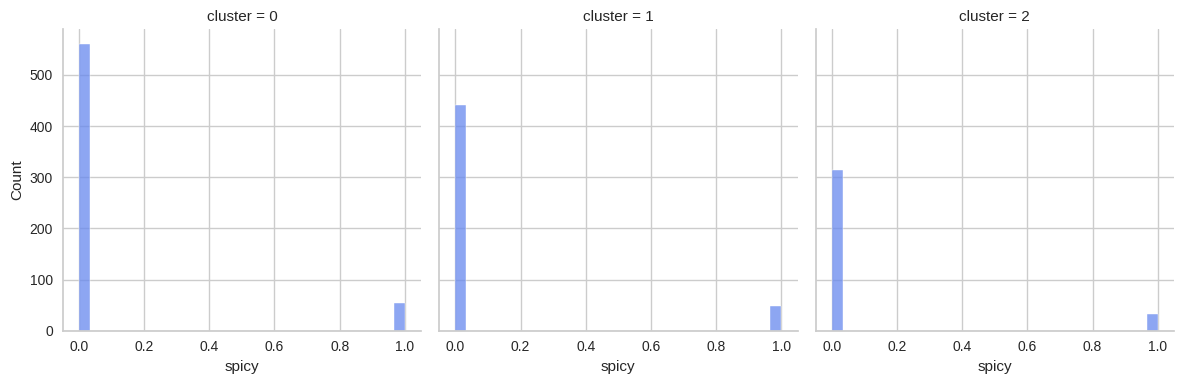

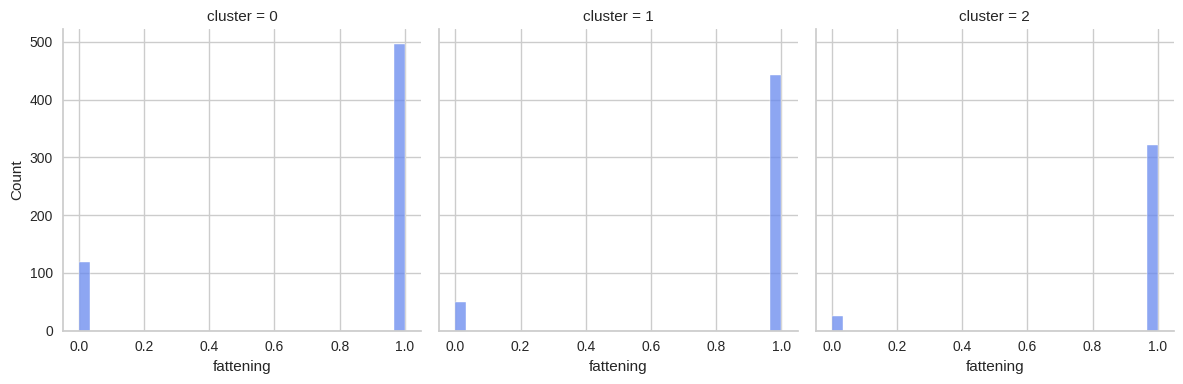

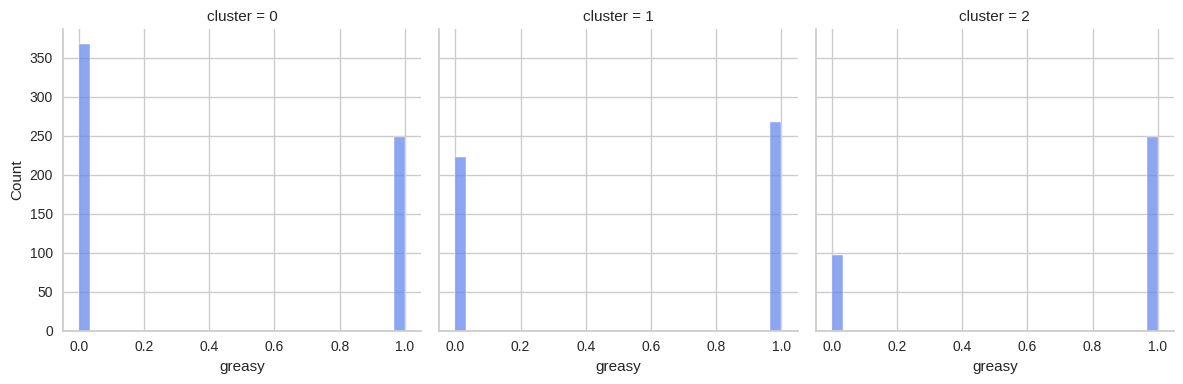

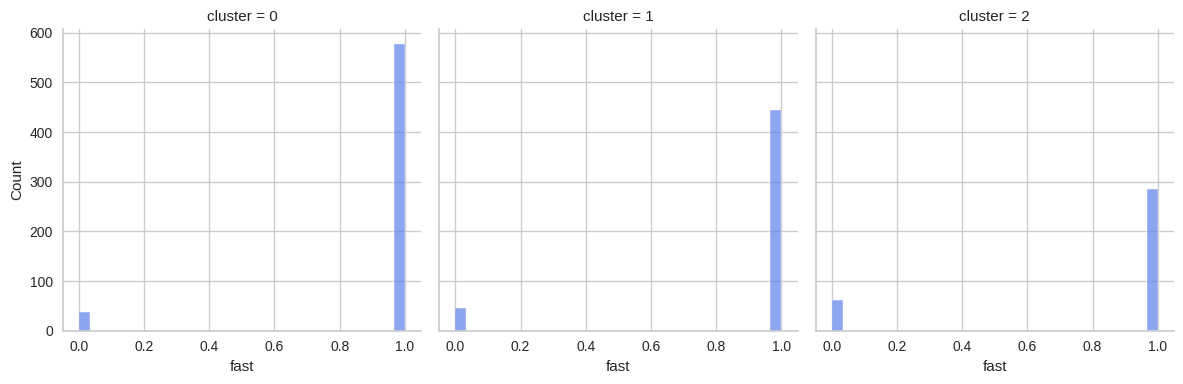

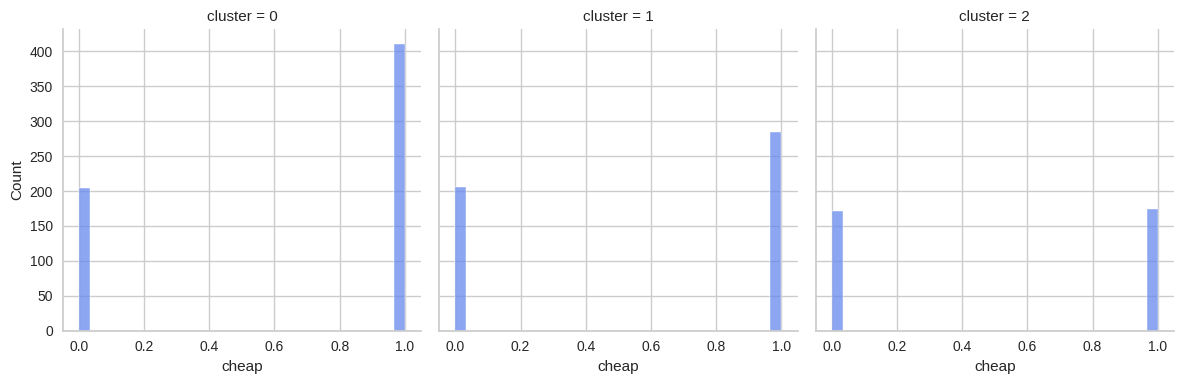

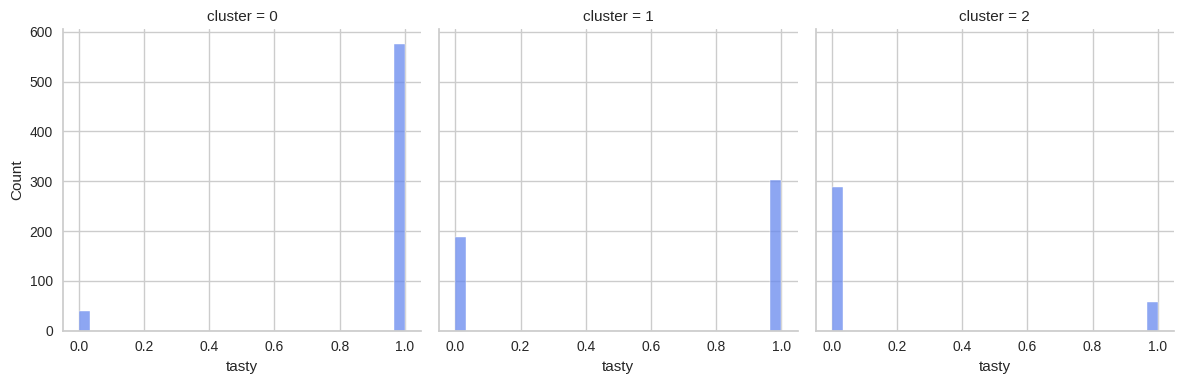

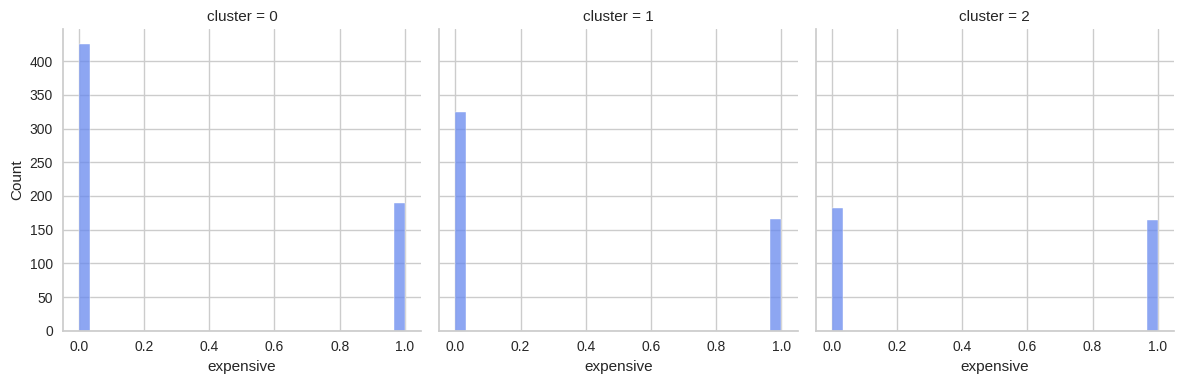

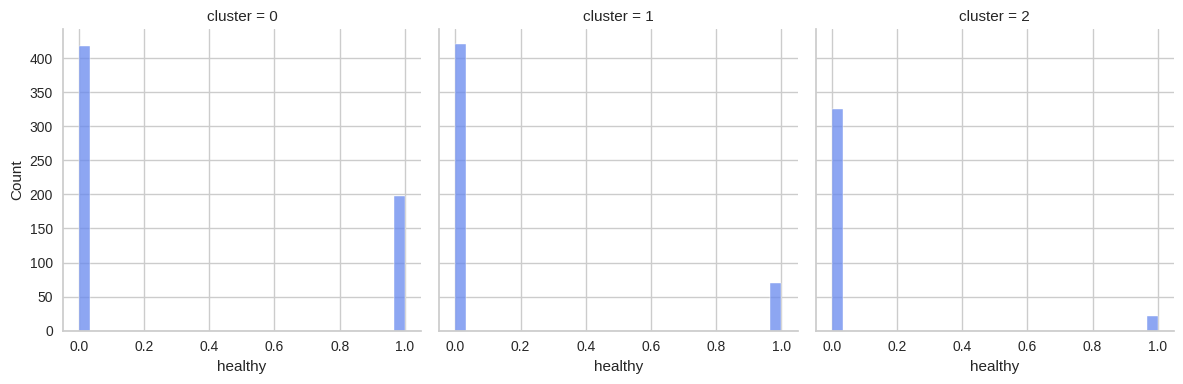

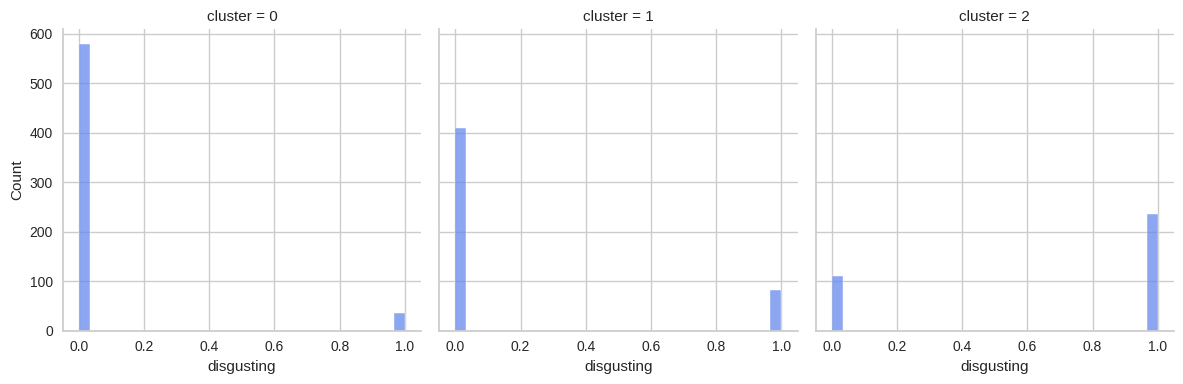

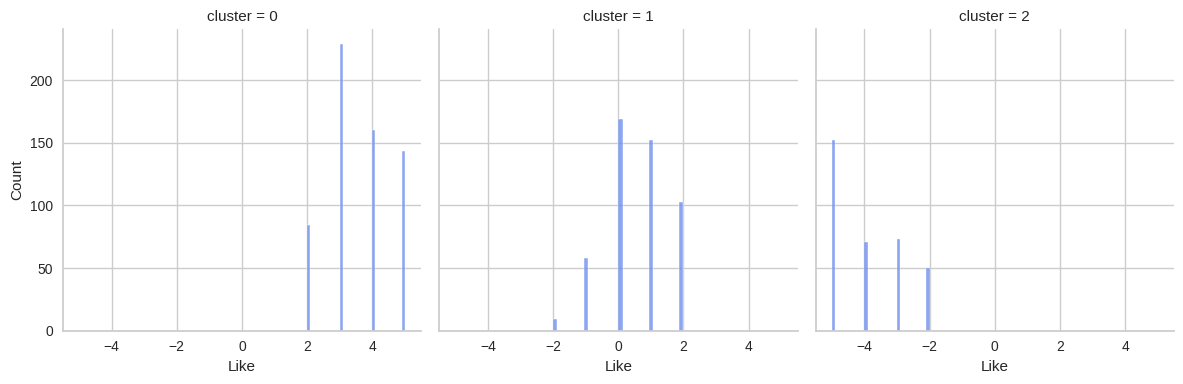

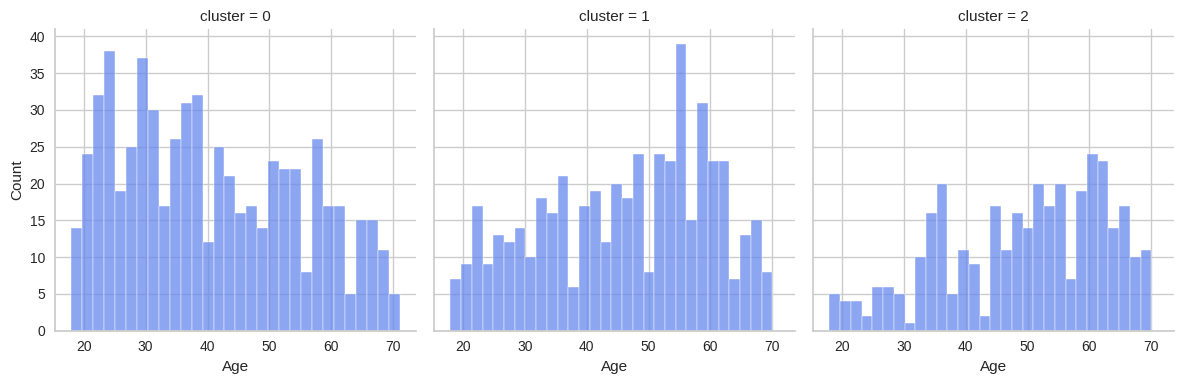

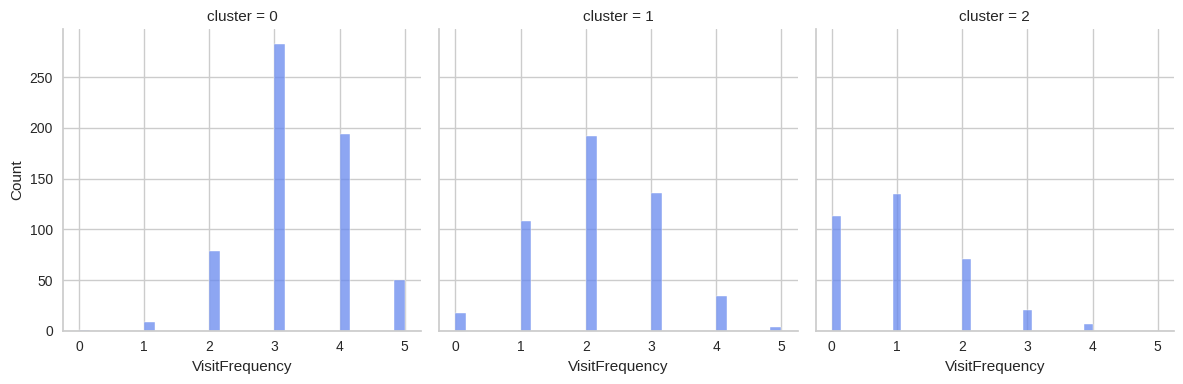

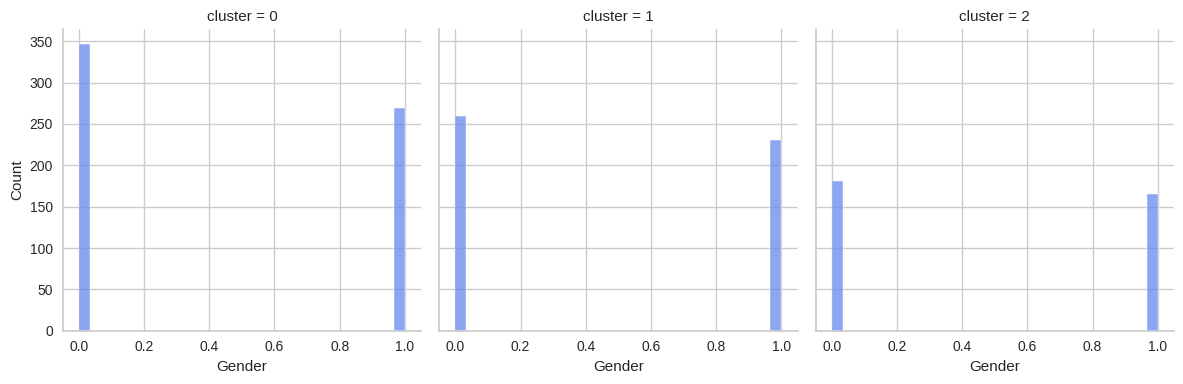

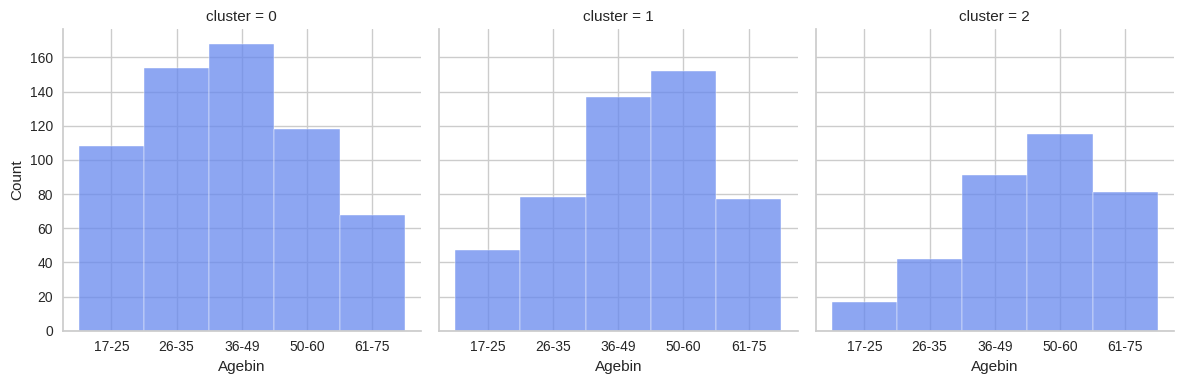

In [51]:
sns.set_palette('coolwarm')
for i in df.drop(['cluster'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='cluster')
  grid = grid.map(sns.histplot,i,bins=30)
plt.show()

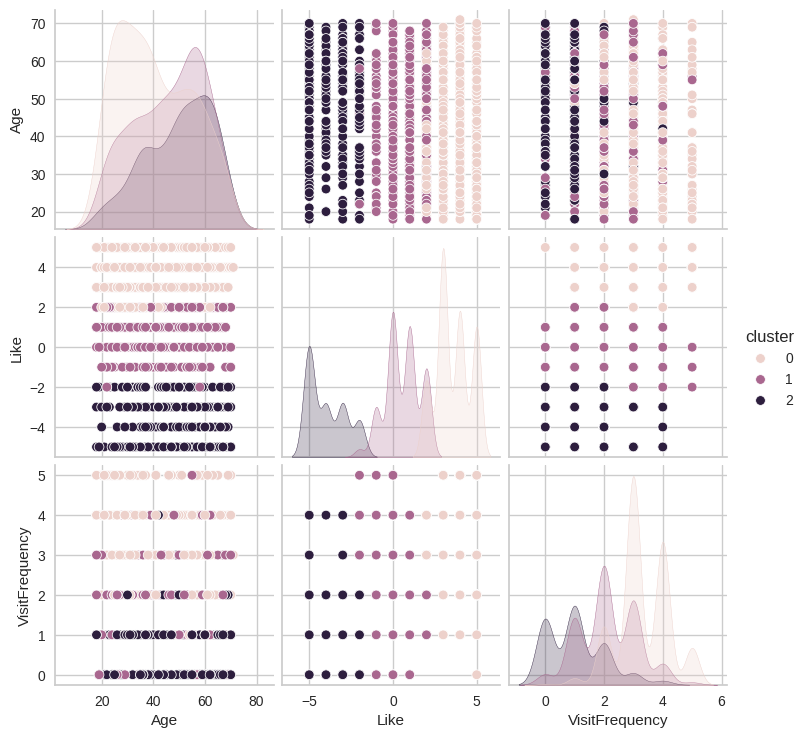

In [52]:
# selecting Target variables

df_1 = df[['Age','Like','VisitFrequency','cluster']]
sns.pairplot(data=df_1,hue='cluster')

Classification


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x = df.drop(['Agebin','cluster'],axis=1)
y = df['cluster']

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,y_train.shape

((1162, 15), (1162,))

In [56]:
## scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
#using logisitc regression for classification
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)

## predictions
preds = clf.predict(x_test)


In [58]:
## performmance of the model
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       0.99      1.00      0.99        98
           2       1.00      0.99      0.99        69

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



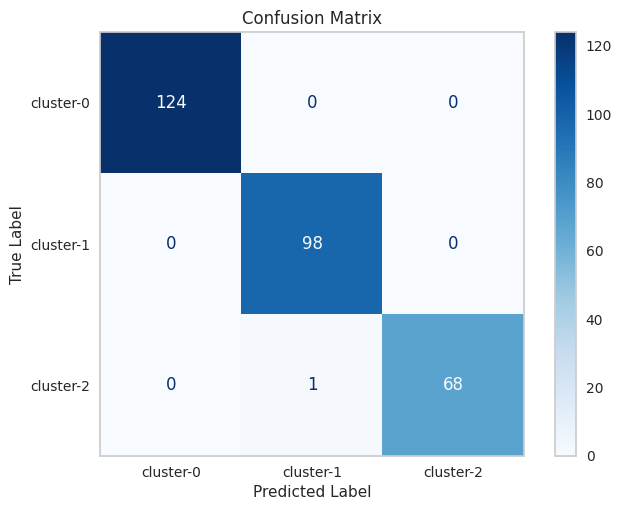

In [67]:
sns.set_style("whitegrid", {'axes.grid' : False})

cm = confusion_matrix(y_test,preds,labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["cluster-0","cluster-1",'cluster-2'])
disp.plot(cmap='Blues',colorbar=True,)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('count12.png')
plt.show()
